import dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/hotel_bookings_cleaned.csv')

# separate target from data
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

print(X.shape)
print(y.shape)

(102064, 32)
(102064,)


Describe data

In [56]:
# describe data
print(df.info())
print()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102064 entries, 0 to 102063
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102064 non-null  int64  
 1   is_canceled                     102064 non-null  int64  
 2   lead_time                       102064 non-null  int64  
 3   arrival_date_year               102064 non-null  int64  
 4   arrival_date_month              102064 non-null  int64  
 5   arrival_date_week_number        102064 non-null  int64  
 6   arrival_date_day_of_month       102064 non-null  int64  
 7   stays_in_weekend_nights         102064 non-null  int64  
 8   stays_in_week_nights            102064 non-null  int64  
 9   adults                          102064 non-null  int64  
 10  children                        102064 non-null  float64
 11  babies                          102064 non-null  int64  
 12  meal            

Understand correlations

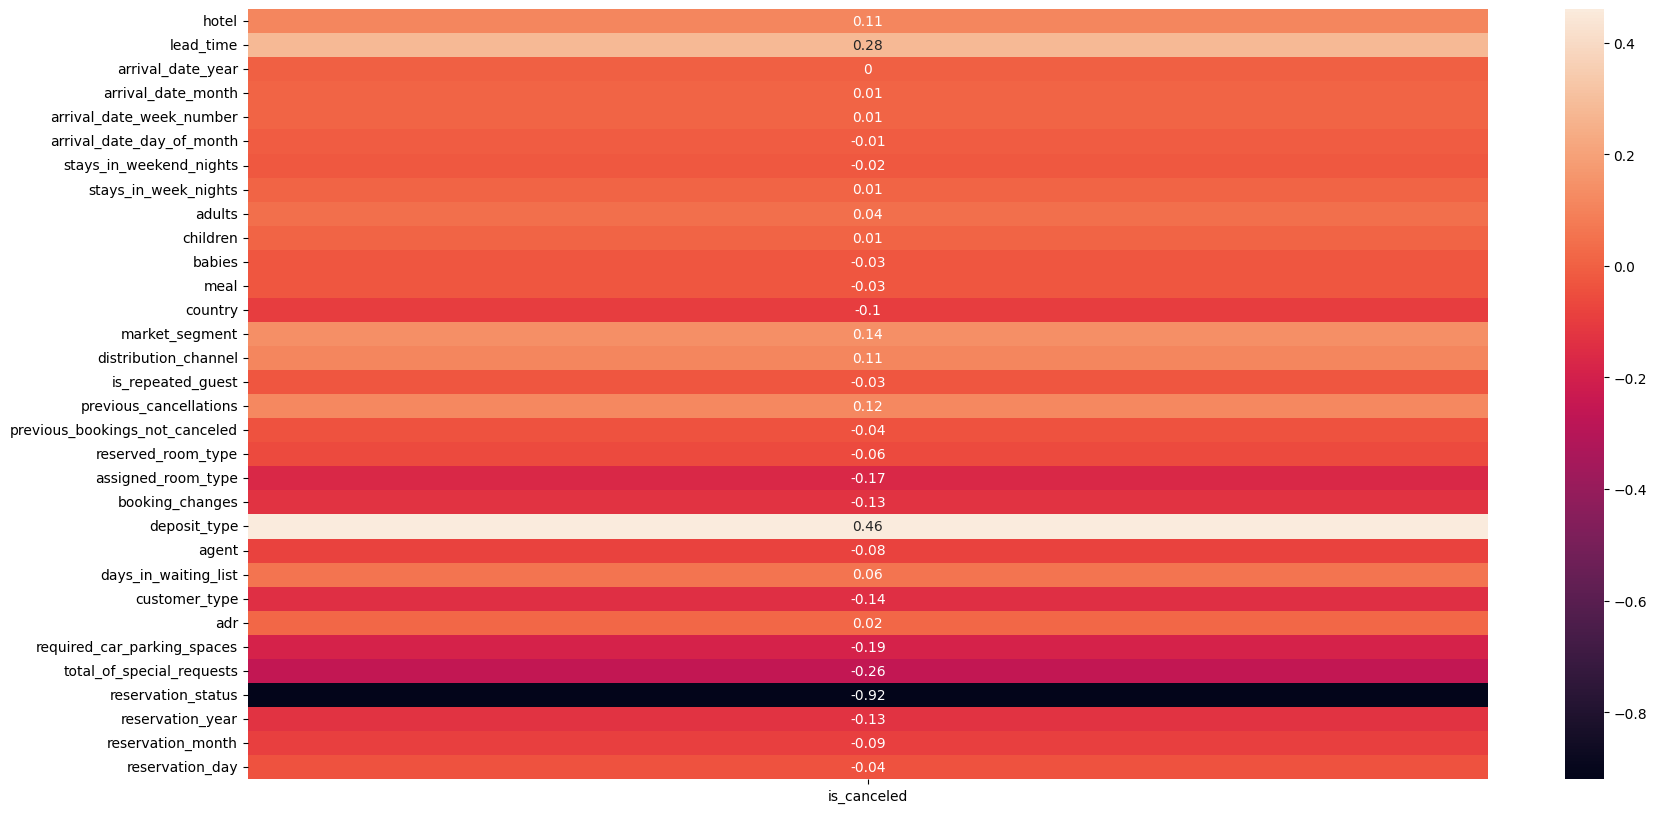

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
corr_matrix = df.corr().round(2)

# Extract the correlation of each feature with 'is_canceled'
corr_is_canceled = corr_matrix[['is_canceled']].drop('is_canceled')

# heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data=corr_is_canceled, annot=True)
plt.show()

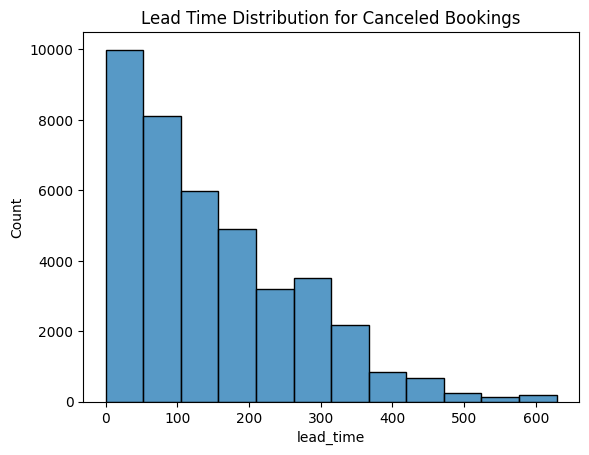

In [18]:
# Filter the DataFrame for is_canceled=0 and is_canceled=1
df_not_canceled = df[df['is_canceled'] == 0]
df_canceled = df[df['is_canceled'] == 1]

# histplot for lead_time and canceled bookings
sns.histplot(x='lead_time', bins=12, data=df_canceled)
plt.title('Lead Time Distribution for Canceled Bookings')
plt.show()

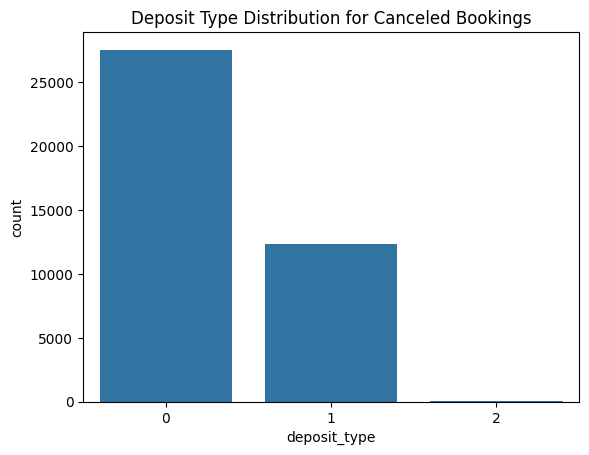

In [23]:
# countplot for deposit_type and canceled bookings (No Deposit':0, 'Non Refund':1, 'Refundable':2)
sns.countplot(x='deposit_type', data=df_canceled)
plt.title('Deposit Type Distribution for Canceled Bookings')
plt.show()

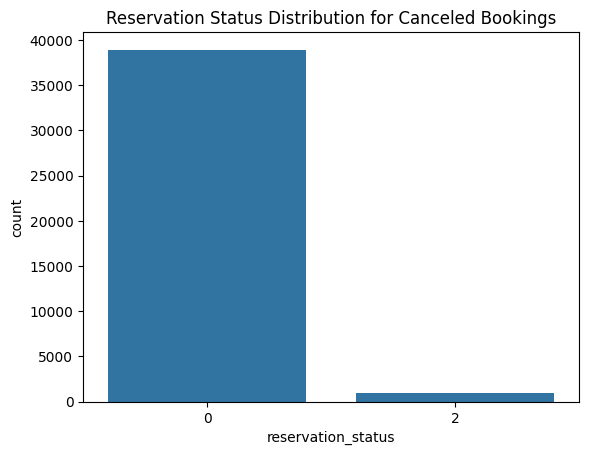

In [27]:
# countplot for reservation_status and canceled bookings ('Canceled':0, 'Check-Out':1, 'No-Show':2)
sns.countplot(x='reservation_status', data=df_canceled)
plt.title('Reservation Status Distribution for Canceled Bookings')
plt.show()

Split data

In [39]:
from sklearn.model_selection import train_test_split

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Implement KNN algorithm

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# train model
knn.fit(X_train, y_train)

# predict on test set
y_pred = knn.predict(X_test)

# evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print()
print('Classification Report:')
print(report)
print()
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8543575172684074

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     12543
           1       0.87      0.73      0.80      7870

    accuracy                           0.85     20413
   macro avg       0.86      0.83      0.84     20413
weighted avg       0.86      0.85      0.85     20413


Confusion Matrix:
[[11670   873]
 [ 2100  5770]]


Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV

# define parameter grid
param_grid = {'n_neighbors': [1,3,5]}

# initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# fit GridSearchCV
grid_search.fit(X_train, y_train)

# best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

Best Parameters: {'n_neighbors': 1}
Best Score: 0.8567072244683367
